In [60]:
data=read.table("demog.2020.txt",header=TRUE,sep='\t')

In [61]:
head(data)

,ROW_ID,ROW_VERSION,recordId,appVersion,phoneInfo,uploadDate,healthCode,externalId,dataGroups,createdOn,⋯,NonIdentifiableDemographics.patientFitzpatrickSkinType,NonIdentifiableDemographics.json.patientHeightInches,NonIdentifiableDemographics.patientHeightInches,NonIdentifiableDemographics.json.patientWakeUpTime,NonIdentifiableDemographics.patientWakeUpTime,NonIdentifiableDemographics.json.patientCurrentAge,NonIdentifiableDemographics.patientCurrentAge,NonIdentifiableDemographics.json.patientGoSleepTime,NonIdentifiableDemographics.patientGoSleepTime,rawData
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<dbl>,⋯,<fct>,<lgl>,<int>,<lgl>,<fct>,<lgl>,<int>,<lgl>,<fct>,<int>
1,379,60,tPFcKoK8moM3YxmSpUGQzMBR,"version 2.3.2, build 818",iPhone 8; iOS/13.4.1,2020-06-04,bv_4_VMi5Pmkcnosk3nlgv1O,NA,,1.591172e+12,⋯,,NA,65,NA,2020-06-03T14:00:00.000-05:00,NA,47,NA,2020-06-03T03:30:00.000-05:00,54155944
2,380,60,exPLS3V7Q_r36HN0P5XQ9TzP,"version 2.3.2, build 818",iPhone 8; iOS/13.4.1,2020-06-04,bv_4_VMi5Pmkcnosk3nlgv1O,NA,,1.591172e+12,⋯,,NA,65,NA,2020-06-03T14:00:00.000-05:00,NA,47,NA,2020-06-03T03:30:00.000-05:00,54155954
3,381,60,Rzx2291Vz9Hnb-PxWHLVdPFT,"version 2.3.2, build 818",iPhone X; iOS/13.4.1,2020-06-04,GDE3Bn93FcIsc3ZslCnRsian,NA,,1.591221e+12,⋯,,NA,69,NA,2020-06-03T07:00:00.000-06:00,NA,56,NA,2020-06-03T22:30:00.000-06:00,54161475
4,382,61,-p3apXEhT3UtVR7gQLt28dwK,"version 2.3.2, build 818",iPhone XR; iOS/13.4.1,2020-06-05,7BuRNiaTP4KFLIMwx1Co7j47,NA,,1.591300e+12,⋯,,NA,69,NA,2020-06-04T07:00:00.000-07:00,NA,22,NA,2020-06-04T21:30:00.000-07:00,54199864
5,383,61,BPkInIqL5DUxHm5rr1mTIuvS,"version 2.3.2, build 818",iPhone XR; iOS/13.4.1,2020-06-05,7BuRNiaTP4KFLIMwx1Co7j47,NA,,1.591308e+12,⋯,,NA,69,NA,2020-06-04T07:00:00.000-07:00,NA,22,NA,2020-06-04T21:30:00.000-07:00,54201014
6,386,63,IuL1kJlztmAC2HznCYkOjqQj,"version 2.3.2, build 818",iPhone XS; iOS/13.5.1,2020-06-07,5-34lmKWVRuNmzDj6ZKYObWY,NA,uk_participant,1.591478e+12,⋯,,NA,70,NA,2020-06-06T07:00:00.000+01:00,NA,56,NA,2020-06-06T21:30:00.000+01:00,54262483


In [62]:
names(data)

[1] "ROW_ID"                                                     
 [2] "ROW_VERSION"                                                
 [3] "recordId"                                                   
 [4] "appVersion"                                                 
 [5] "phoneInfo"                                                  
 [6] "uploadDate"                                                 
 [7] "healthCode"                                                 
 [8] "externalId"                                                 
 [9] "dataGroups"                                                 
[10] "createdOn"                                                  
[11] "createdOnTimeZone"                                          
[12] "userSharingScope"                                           
[13] "validationErrors"                                           
[14] "substudyMemberships"                                        
[15] "dayInStudy"                                                 
[16] "NonIdentifiableDemographics.json.patientWeightPounds"       
[17] "NonIdentifiableDemographics.patientWeightPounds"            
[18] "NonIdentifiableDemographics.json.patientBiologicalSex"      
[19] "NonIdentifiableDemographics.patientBiologicalSex"           
[20] "NonIdentifiableDemographics.json.patientBloodType"          
[21] "NonIdentifiableDemographics.patientBloodType"               
[22] "NonIdentifiableDemographics.json.patientFitzpatrickSkinType"
[23] "NonIdentifiableDemographics.patientFitzpatrickSkinType"     
[24] "NonIdentifiableDemographics.json.patientHeightInches"       
[25] "NonIdentifiableDemographics.patientHeightInches"            
[26] "NonIdentifiableDemographics.json.patientWakeUpTime"         
[27] "NonIdentifiableDemographics.patientWakeUpTime"              
[28] "NonIdentifiableDemographics.json.patientCurrentAge"         
[29] "NonIdentifiableDemographics.patientCurrentAge"              
[30] "NonIdentifiableDemographics.json.patientGoSleepTime"        
[31] "NonIdentifiableDemographics.patientGoSleepTime"             
[32] "rawData"

In [63]:
length(unique(data$healthCode))

[1] 232

In [64]:
age=na.omit(unique(subset(data,select=c("healthCode","NonIdentifiableDemographics.patientCurrentAge"))))

In [65]:
median(age$NonIdentifiableDemographics.patientCurrentAge)

[1] 44

In [66]:
sd(age$NonIdentifiableDemographics.patientCurrentAge)

[1] 15.88338

In [67]:
mean(age$NonIdentifiableDemographics.patientCurrentAge)

[1] 46.27679

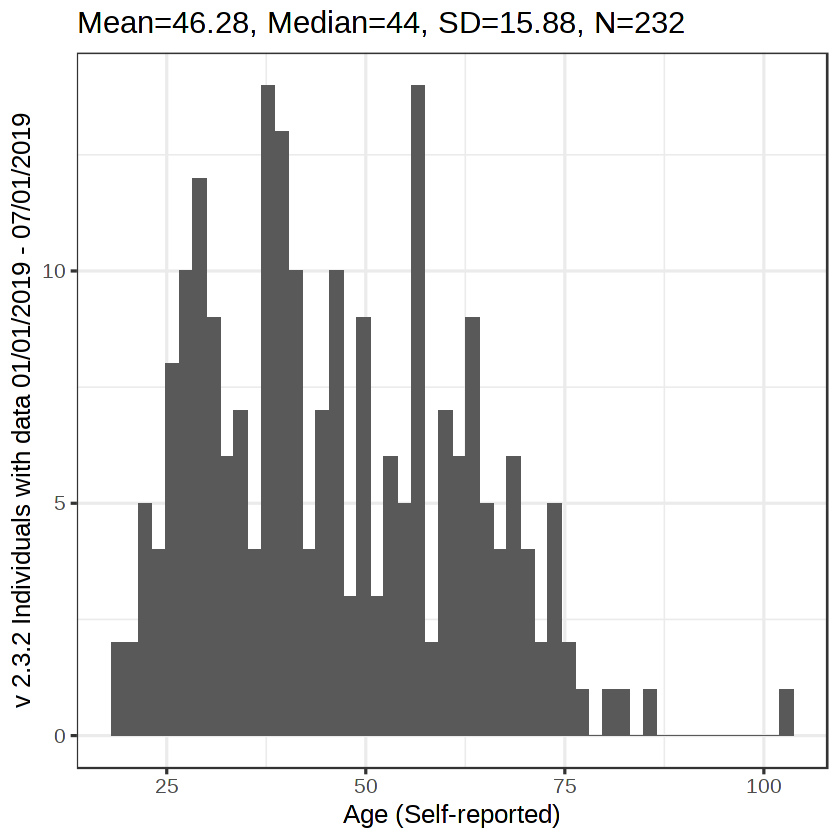

In [69]:
library(ggplot2)
ggplot(data=age,aes(x=age$NonIdentifiableDemographics.patientCurrentAge))+geom_histogram(bins=50)+
xlab("Age (Self-reported)")+
ylab("v 2.3.2 Individuals with data 01/01/2019 - 07/01/2019")+
ggtitle("Mean=46.28, Median=44, SD=15.88, N=232")+
theme_bw(15)

In [70]:
sex=na.omit(unique(subset(data,select=c("healthCode","NonIdentifiableDemographics.patientBiologicalSex"))))

In [71]:
table(sex$NonIdentifiableDemographics.patientBiologicalSex)


       Female   Male 
    10     48    180 

In [73]:
180+48

[1] 228

[1] 28

In [56]:
136+29

[1] 165